# learning python libraies PART 17

aNAND tIRKEY

In [1]:
import numpy as np
import platform
import matplotlib as mpl                   #importing libraries
import matplotlib.pylab as plt
print(platform.python_version())
print(np.__version__)
print(mpl.__version__)
print(plt.__version__)

3.7.4
1.18.1
3.1.3
1.18.1


In [2]:
import pandas as pd                   #importing library
print(pd.__version__) 

1.0.0


In [3]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.0.0
numpy            : 1.18.1
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 20.0.2
setuptools       : 45.1.0.post20200127
Cython           : 0.29.14
pytest           : 5.3.5
hypothesis       : 5.4.1
sphinx           : 2.3.1
blosc            : None
feather          : None
xlsxwriter       : 1.2.7
lxml.etree       : 4.5.0
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.1
IPython          : 7.12.0
pandas_datareader: None
bs4              : 4.8.2
bottleneck       : 1.3.1
fastparquet      : None
gcsfs            : None
lxml.etree       :

##### add grid lines to data Frames

In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [5]:
date=pd.Series(["5/1/2017","5/2/2017","5/3/2017","5/1/2017","5/2/2017","5/3/2017","5/1/2017","5/2/2017","5/3/2017"])
city=pd.Series(['new york','new york','new york','mumbai','mumbai','mumbai','beijing','beijing','beijing'])
temp=pd.Series([65,66,68,75,78,82,80,77,79])
humid=pd.Series([56,58,60,80,83,85,26,30,35])

df=pd.DataFrame({
    "Date":date,
    "City":city,
    "Temprature":temp,
    "Humidity":humid})
df

,Date,City,Temprature,Humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


# 1. pivot table
##### Used to Summerize Data or Make it look more Sensible   
DataFrame.pivot_table(data, values=None, index=None, columns=None,aggfunc='mean',fill_value=None, margins=False,dropna=True, margins_name='All')

### 1.1 The View

##### View 1

In [6]:
df.pivot(index="City",columns="Date")

Temprature                   Humidity                  
Date       5/1/2017 5/2/2017 5/3/2017 5/1/2017 5/2/2017 5/3/2017
City                                                            
beijing          80       77       79       26       30       35
mumbai           75       78       82       80       83       85
new york         65       66       68       56       58       60

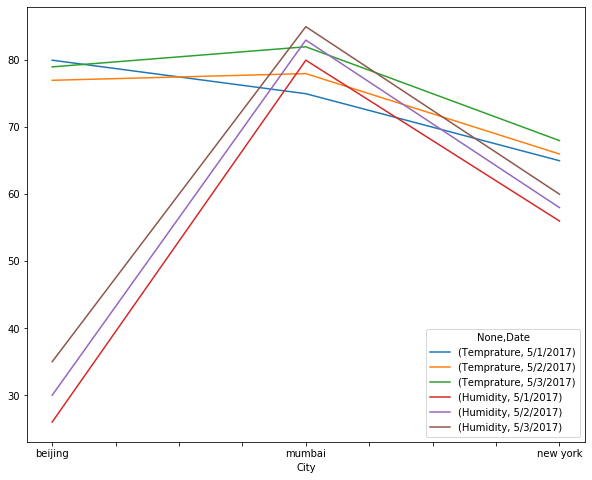

In [7]:
plt.rcParams['figure.figsize']=[10,8] 
df.pivot(index="City",columns="Date").plot()

#####  View 2

In [8]:
df.pivot_table(index="Date",columns="City")


Humidity                 Temprature                
City      beijing mumbai new york    beijing mumbai new york
Date                                                        
5/1/2017       26     80       56         80     75       65
5/2/2017       30     83       58         77     78       66
5/3/2017       35     85       60         79     82       68

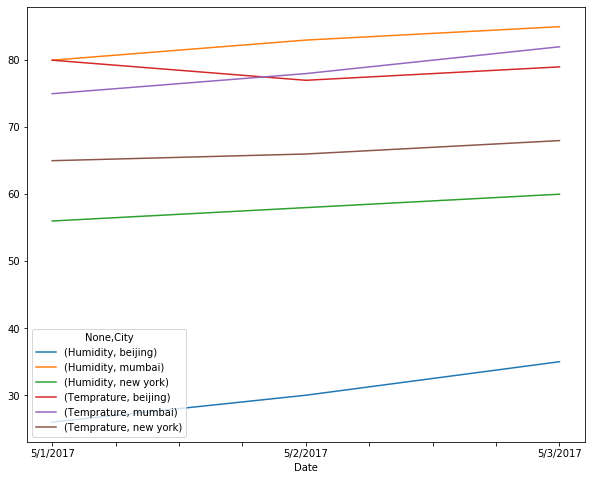

In [9]:
df.pivot_table(index="Date",columns="City").plot()

In [10]:
df.pivot_table(index="Date",columns="City",values=["City","Temprature","Humidity"])

Humidity                 Temprature                
City      beijing mumbai new york    beijing mumbai new york
Date                                                        
5/1/2017       26     80       56         80     75       65
5/2/2017       30     83       58         77     78       66
5/3/2017       35     85       60         79     82       68

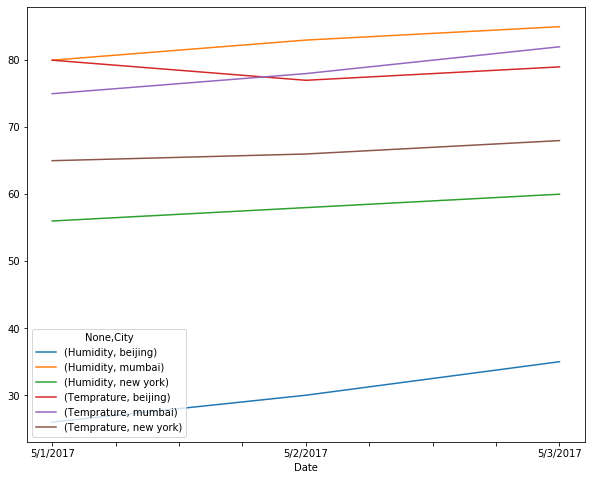

In [11]:
df.pivot_table(index="Date",columns="City",values=["City","Temprature","Humidity"]).plot()

##### View 3

In [12]:
df.pivot_table(index=["City","Date"])

Humidity  Temprature
City     Date                          
beijing  5/1/2017        26          80
         5/2/2017        30          77
         5/3/2017        35          79
mumbai   5/1/2017        80          75
         5/2/2017        83          78
         5/3/2017        85          82
new york 5/1/2017        56          65
         5/2/2017        58          66
         5/3/2017        60          68

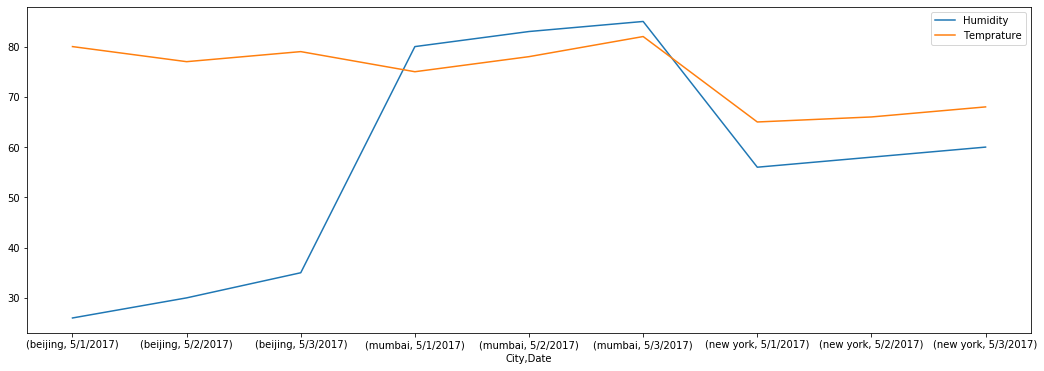

In [13]:
plt.rcParams['figure.figsize']=[18,6] 
df.pivot_table(index=["City","Date"]).plot()

##### View 4

In [14]:
df.pivot_table(index=["Date","City"])

Humidity  Temprature
Date     City                          
5/1/2017 beijing         26          80
         mumbai          80          75
         new york        56          65
5/2/2017 beijing         30          77
         mumbai          83          78
         new york        58          66
5/3/2017 beijing         35          79
         mumbai          85          82
         new york        60          68

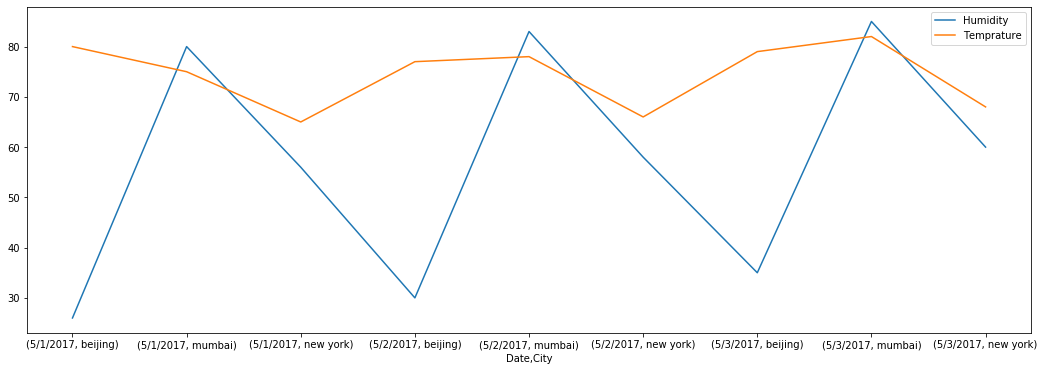

In [15]:
df.pivot_table(index=["Date","City"]).plot()

In [16]:
df.pivot_table(index=["City","Date"]).T

City        beijing                     mumbai                   new york  \
Date       5/1/2017 5/2/2017 5/3/2017 5/1/2017 5/2/2017 5/3/2017 5/1/2017   
Humidity         26       30       35       80       83       85       56   
Temprature       80       77       79       75       78       82       65   

City                          
Date       5/2/2017 5/3/2017  
Humidity         58       60  
Temprature       66       68

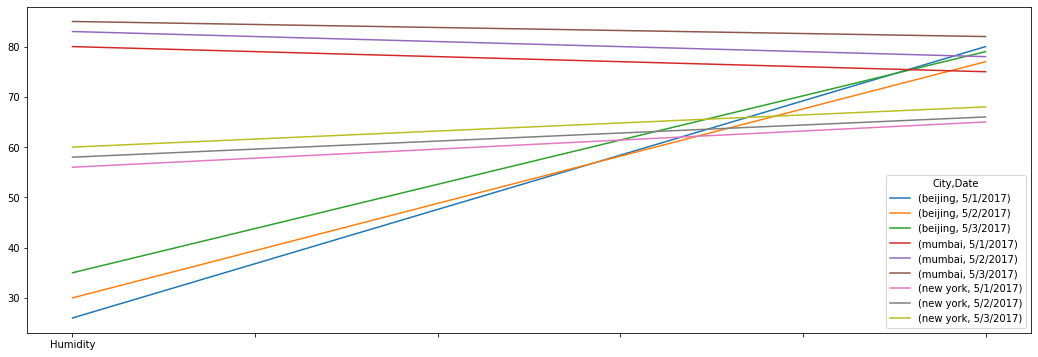

In [17]:
df.pivot_table(index=["City","Date"]).T.plot()

##### Pandas Doesnot Know relationship between Data  (Wrong Examples)

In [18]:
df.pivot_table(index="Humidity",columns="Date")

Temprature                  
Date       5/1/2017 5/2/2017 5/3/2017
Humidity                             
26             80.0      NaN      NaN
30              NaN     77.0      NaN
35              NaN      NaN     79.0
56             65.0      NaN      NaN
58              NaN     66.0      NaN
60              NaN      NaN     68.0
80             75.0      NaN      NaN
83              NaN     78.0      NaN
85              NaN      NaN     82.0

In [19]:
df.pivot_table(index="Humidity",columns="City")

Temprature                
City        beijing mumbai new york
Humidity                           
26             80.0    NaN      NaN
30             77.0    NaN      NaN
35             79.0    NaN      NaN
56              NaN    NaN     65.0
58              NaN    NaN     66.0
60              NaN    NaN     68.0
80              NaN   75.0      NaN
83              NaN   78.0      NaN
85              NaN   82.0      NaN

In [20]:
df.pivot_table(index="City",columns=["Humidity","Temprature"])

DataError: No numeric types to aggregate

### 1.2 Aggrigate funtion on Pivot table

In [32]:
df.pivot_table(index="City",aggfunc='sum')

,Humidity,Temprature
City,,
beijing,91,236
mumbai,248,235
new york,174,199


In [33]:
df.pivot_table(index="City",aggfunc='mean')

,Humidity,Temprature
City,,
beijing,30.333333,78.666667
mumbai,82.666667,78.333333
new york,58.000000,66.333333


# 2. [CrossTable](https://pbpython.com/pandas-crosstab.html)
The crosstab() function is used to compute a simple cross tabulation of two (or more) factors.  
The crosstab function can operate on numpy arrays, series or columns in a dataframe.  

##### This compares the index and column to get the count.

In [21]:
pd.crosstab(index=df["City"],columns=[df["Humidity"],df["Temprature"]])

Humidity,26,30,35,56,58,60,80,83,85
Temprature,80,77,79,65,66,68,75,78,82
City,,,,,,,,,
beijing,1,1,1,0,0,0,0,0,0
mumbai,0,0,0,0,0,0,1,1,1
new york,0,0,0,1,1,1,0,0,0


In [22]:
pd.crosstab(index=df["Date"],columns=[df["Humidity"],df["Temprature"]])

Humidity,26,30,35,56,58,60,80,83,85
Temprature,80,77,79,65,66,68,75,78,82
Date,,,,,,,,,
5/1/2017,1,0,0,1,0,0,1,0,0
5/2/2017,0,1,0,0,1,0,0,1,0
5/3/2017,0,0,1,0,0,1,0,0,1


In [23]:
pd.crosstab(index=[df["Humidity"],df["Temprature"]],columns=df["City"])

,City,beijing,mumbai,new york
Humidity,Temprature,,,
26,80,1,0,0
30,77,1,0,0
35,79,1,0,0
56,65,0,0,1
58,66,0,0,1
60,68,0,0,1
80,75,0,1,0
83,78,0,1,0
85,82,0,1,0


In [24]:
import seaborn as sns

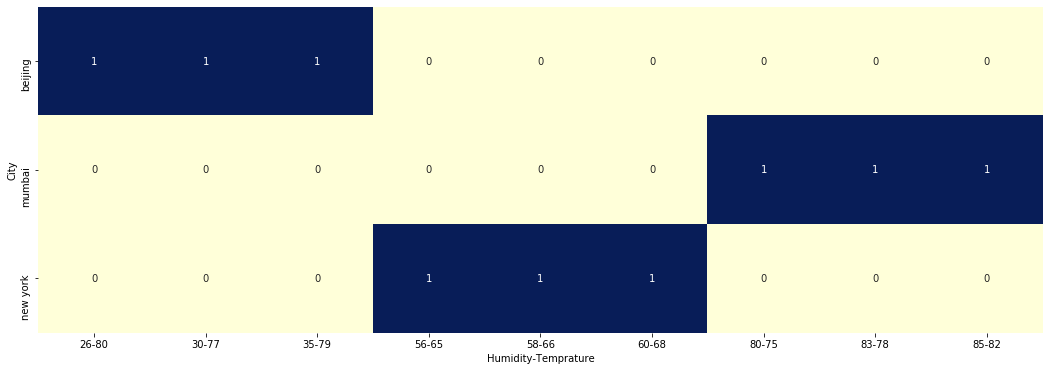

In [25]:
sns.heatmap(pd.crosstab(index=df["City"],columns=[df["Humidity"],df["Temprature"]]),cmap="YlGnBu", annot=True, cbar=False)

In [65]:
df

,Date,City,Temprature,Humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [74]:
pd.crosstab([df.City,df.Temprature,df.Humidity] ,df.Date, margins=True)

Date                          5/1/2017  5/2/2017  5/3/2017  All
City     Temprature Humidity                                   
beijing  77         30               0         1         0    1
         79         35               0         0         1    1
         80         26               1         0         0    1
mumbai   75         80               1         0         0    1
         78         83               0         1         0    1
         82         85               0         0         1    1
new york 65         56               1         0         0    1
         66         58               0         1         0    1
         68         60               0         0         1    1
All                                  3         3         3    9

In [75]:
pd.crosstab([df.City,df.Temprature,df.Humidity] ,df.Date, margins=True).T

City       beijing       mumbai       new york       All
Temprature      77 79 80     75 78 82       65 66 68    
Humidity        30 35 26     80 83 85       56 58 60    
Date                                                    
5/1/2017         0  0  1      1  0  0        1  0  0   3
5/2/2017         1  0  0      0  1  0        0  1  0   3
5/3/2017         0  1  0      0  0  1        0  0  1   3
All              1  1  1      1  1  1        1  1  1   9

In [76]:
pd.crosstab(df.Date,[df.City,df.Temprature,df.Humidity], margins=True)

City       beijing       mumbai       new york       All
Temprature      77 79 80     75 78 82       65 66 68    
Humidity        30 35 26     80 83 85       56 58 60    
Date                                                    
5/1/2017         0  0  1      1  0  0        1  0  0   3
5/2/2017         1  0  0      0  1  0        0  1  0   3
5/3/2017         0  1  0      0  0  1        0  0  1   3
All              1  1  1      1  1  1        1  1  1   9

In [26]:
df1=pd.read_csv('data_set/part14.csv')  #importing Data Set
df1

,States,Area,Population,Density,Gender_Ratio,Zone,Nominal GDP
0,Uttar Pradesh,240928.0,199812341.0,828.0,0.879,central zone,220 Billion USD
1,Maharashtra,307713.0,112372972.0,365.0,0.878,western zone,420 Billion USD
2,Bihar,94163.0,103804637.0,1102.0,0.916,eastern zone,80 Billion USD
3,West Bengal,88752.0,91347736.0,1029.0,0.951,eastern zone,180 Billion USD
4,Madhya Pradesh,308245.0,72597565.0,236.0,0.919,central zone,130 Billion USD
5,Tamil Nadu,130058.0,72138958.0,555.0,0.911,southern zone,260 Billion USD
6,Rajasthan,342239.0,68621012.0,201.0,0.861,northern zone,130 Billion USD
7,Karnataka,191791.0,61130704.0,319.0,0.939,southern zone,220 Billion USD
8,Gujrat,196024.0,60383628.0,308.0,0.854,western zone,240 Billion USD
9,Andhra Pradesh,162968.0,49386799.0,303.0,0.918,southern zone,150 Billion USD


In [27]:
pd.crosstab(index=df1["States"],columns=df1["Zone"])

Zone,central zone,eastern zone,northern zone,southern zone,western zone
States,,,,,
Andhra Pradesh,0,0,0,1,0
Bihar,0,1,0,0,0
Gujrat,0,0,0,0,1
Karnataka,0,0,0,1,0
Madhya Pradesh,1,0,0,0,0
Maharashtra,0,0,0,0,1
Rajasthan,0,0,1,0,0
Tamil Nadu,0,0,0,1,0
Uttar Pradesh,1,0,0,0,0


In [28]:
pd.crosstab(index=df1["States"],columns=df1["States"])

States,Andhra Pradesh,Bihar,Gujrat,Karnataka,Madhya Pradesh,Maharashtra,Rajasthan,Tamil Nadu,Uttar Pradesh,West Bengal
States,,,,,,,,,,
Andhra Pradesh,1,0,0,0,0,0,0,0,0,0
Bihar,0,1,0,0,0,0,0,0,0,0
Gujrat,0,0,1,0,0,0,0,0,0,0
Karnataka,0,0,0,1,0,0,0,0,0,0
Madhya Pradesh,0,0,0,0,1,0,0,0,0,0
Maharashtra,0,0,0,0,0,1,0,0,0,0
Rajasthan,0,0,0,0,0,0,1,0,0,0
Tamil Nadu,0,0,0,0,0,0,0,1,0,0
Uttar Pradesh,0,0,0,0,0,0,0,0,1,0


In [29]:
pd.crosstab(index=df1["Zone"],columns=df1["States"])

States,Andhra Pradesh,Bihar,Gujrat,Karnataka,Madhya Pradesh,Maharashtra,Rajasthan,Tamil Nadu,Uttar Pradesh,West Bengal
Zone,,,,,,,,,,
central zone,0,0,0,0,1,0,0,0,1,0
eastern zone,0,1,0,0,0,0,0,0,0,1
northern zone,0,0,0,0,0,0,1,0,0,0
southern zone,1,0,0,1,0,0,0,1,0,0
western zone,0,0,1,0,0,1,0,0,0,0


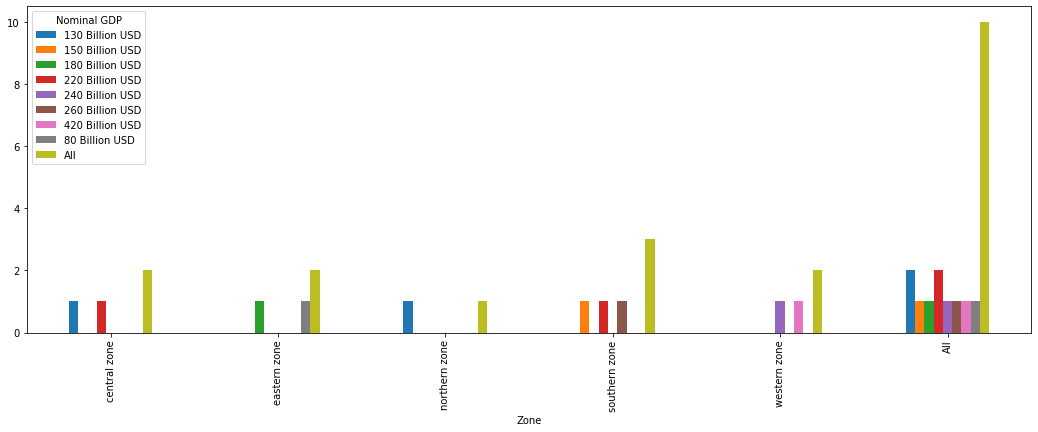

In [38]:
pd.crosstab(index=df1["Zone"],columns=df1["Nominal GDP"],margins=True).plot.bar()

In [51]:
pd.crosstab(index=df1["Nominal GDP"],columns=df1["Zone"],margins=True)

Zone,central zone,eastern zone,northern zone,southern zone,western zone,All
Nominal GDP,,,,,,
130 Billion USD,1,0,1,0,0,2
150 Billion USD,0,0,0,1,0,1
180 Billion USD,0,1,0,0,0,1
220 Billion USD,1,0,0,1,0,2
240 Billion USD,0,0,0,0,1,1
260 Billion USD,0,0,0,1,0,1
420 Billion USD,0,0,0,0,1,1
80 Billion USD,0,1,0,0,0,1
All,2,2,1,3,2,10


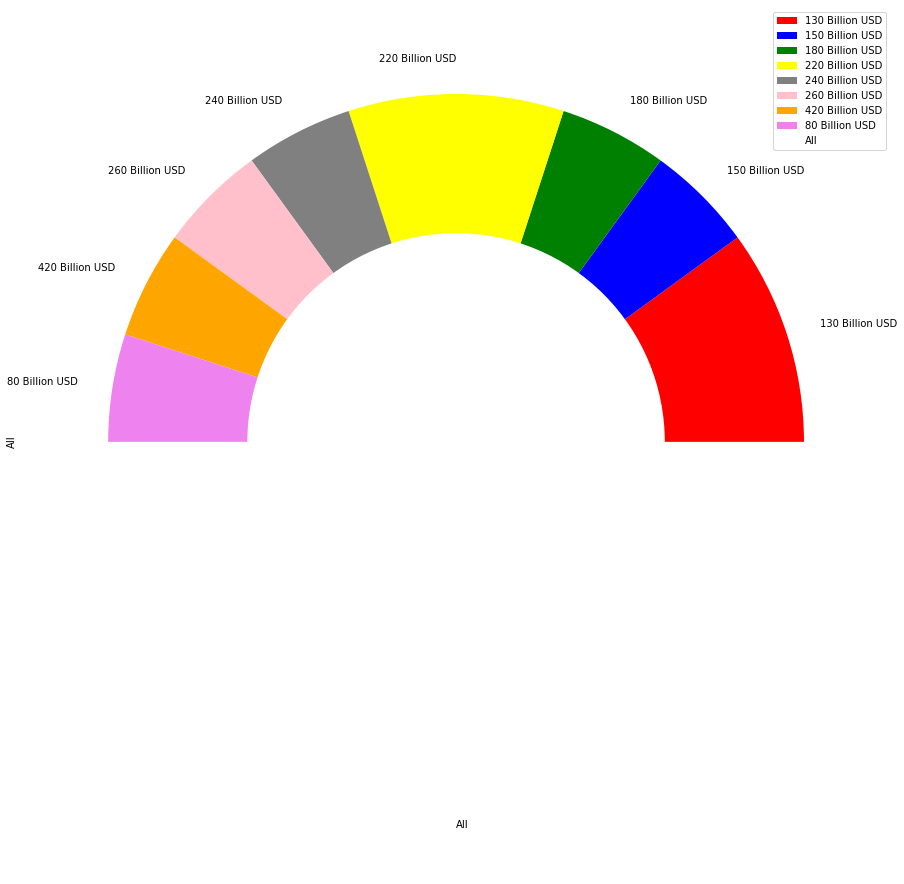

In [64]:
plt.rcParams['figure.figsize']=[18,16] 
pd.crosstab(index=df1["Nominal GDP"],columns=df1["Zone"],margins=True).plot.pie(y='All',colors=['Red','blue','green','yellow','grey','pink','orange','violet','white'])
centre_circle = plt.Circle((0.0, 0.0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)